In [32]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [33]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定

In [43]:
NUM_CLASSES = 7

# 学習データ読み込み

In [44]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [45]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [47]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [48]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_6 (Dropout)         (None, 42)                0         
                                                                 
 dense_9 (Dense)             (None, 20)                860       
                                                                 
 dropout_7 (Dropout)         (None, 20)                0         
                                                                 
 dense_10 (Dense)            (None, 10)                210       
                                                                 
 dense_11 (Dense)            (None, 7)                 77        
                                                                 
Total params: 1,147
Trainable params: 1,147
Non-trainable params: 0
_________________________________________________________________


In [49]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [50]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [51]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
28/34 [=======================>......] - ETA: 0s - loss: 1.9288 - accuracy: 0.1454
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 7ms/step - loss: 1.9113 - accuracy: 0.1593 - val_loss: 1.7997 - val_accuracy: 0.2379
Epoch 2/1000
34/34 [==============================] - ETA: 0s - loss: 1.7696 - accuracy: 0.2646
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 3ms/step - loss: 1.7696 - accuracy: 0.2646 - val_loss: 1.7055 - val_accuracy: 0.2753
Epoch 3/1000
34/34 [==============================] - ETA: 0s - loss: 1.7005 - accuracy: 0.2812
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 9ms/step - loss: 1.7005 - accuracy: 0.2812 - val_loss: 1.6259 - val_accuracy: 0.2795
Epoch 4/1000
24/34 [====================>.........] - ETA: 0s - loss: 1.6283 - accuracy: 0.3187
E

31/34 [==========================>...] - ETA: 0s - loss: 0.9848 - accuracy: 0.6086
Epoch 28: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 3ms/step - loss: 0.9857 - accuracy: 0.6092 - val_loss: 0.6224 - val_accuracy: 0.8849
Epoch 29/1000
 1/34 [..............................] - ETA: 0s - loss: 1.0393 - accuracy: 0.5938
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 3ms/step - loss: 0.9772 - accuracy: 0.6272 - val_loss: 0.6115 - val_accuracy: 0.8946
Epoch 30/1000
 1/34 [..............................] - ETA: 0s - loss: 1.0285 - accuracy: 0.5938
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 3ms/step - loss: 0.9643 - accuracy: 0.6249 - val_loss: 0.5986 - val_accuracy: 0.9008
Epoch 31/1000
33/34 [============================>.] - ETA: 0s - loss: 0.9559 - accuracy: 0.6271
Epoch 31

25/34 [=====================>........] - ETA: 0s - loss: 0.8650 - accuracy: 0.6753
Epoch 55: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 7ms/step - loss: 0.8639 - accuracy: 0.6718 - val_loss: 0.4374 - val_accuracy: 0.9237
Epoch 56/1000
28/34 [=======================>......] - ETA: 0s - loss: 0.8578 - accuracy: 0.6850
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 7ms/step - loss: 0.8505 - accuracy: 0.6883 - val_loss: 0.4363 - val_accuracy: 0.9251
Epoch 57/1000
27/34 [======================>.......] - ETA: 0s - loss: 0.8446 - accuracy: 0.6832
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 3ms/step - loss: 0.8425 - accuracy: 0.6859 - val_loss: 0.4306 - val_accuracy: 0.9258
Epoch 58/1000
 1/34 [..............................] - ETA: 0s - loss: 0.7801 - accuracy: 0.7109
Epoch 58

 1/34 [..............................] - ETA: 0s - loss: 0.7264 - accuracy: 0.6875
Epoch 82: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 3ms/step - loss: 0.7932 - accuracy: 0.7128 - val_loss: 0.3607 - val_accuracy: 0.9369
Epoch 83/1000
 1/34 [..............................] - ETA: 0s - loss: 0.7487 - accuracy: 0.6797
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 3ms/step - loss: 0.7876 - accuracy: 0.7135 - val_loss: 0.3593 - val_accuracy: 0.9390
Epoch 84/1000
 1/34 [..............................] - ETA: 0s - loss: 0.8517 - accuracy: 0.6719
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 3ms/step - loss: 0.7939 - accuracy: 0.7054 - val_loss: 0.3545 - val_accuracy: 0.9355
Epoch 85/1000
 1/34 [..............................] - ETA: 0s - loss: 0.8471 - accuracy: 0.6875
Epoch 85

25/34 [=====================>........] - ETA: 0s - loss: 0.7643 - accuracy: 0.7153
Epoch 109: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 7ms/step - loss: 0.7595 - accuracy: 0.7216 - val_loss: 0.3352 - val_accuracy: 0.9404
Epoch 110/1000
26/34 [=====================>........] - ETA: 0s - loss: 0.7378 - accuracy: 0.7317
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 7ms/step - loss: 0.7449 - accuracy: 0.7278 - val_loss: 0.3277 - val_accuracy: 0.9438
Epoch 111/1000
33/34 [============================>.] - ETA: 0s - loss: 0.7336 - accuracy: 0.7292
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 5ms/step - loss: 0.7360 - accuracy: 0.7278 - val_loss: 0.3170 - val_accuracy: 0.9473
Epoch 112/1000
29/34 [========================>.....] - ETA: 0s - loss: 0.7437 - accuracy: 0.7290
Ep

Epoch 136/1000
27/34 [======================>.......] - ETA: 0s - loss: 0.7379 - accuracy: 0.7306
Epoch 136: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 7ms/step - loss: 0.7379 - accuracy: 0.7331 - val_loss: 0.3077 - val_accuracy: 0.9362
Epoch 137/1000
25/34 [=====================>........] - ETA: 0s - loss: 0.7338 - accuracy: 0.7287
Epoch 137: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 7ms/step - loss: 0.7320 - accuracy: 0.7301 - val_loss: 0.3135 - val_accuracy: 0.9459
Epoch 138/1000
29/34 [========================>.....] - ETA: 0s - loss: 0.7023 - accuracy: 0.7497
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 6ms/step - loss: 0.7135 - accuracy: 0.7426 - val_loss: 0.3086 - val_accuracy: 0.9438
Epoch 139/1000
34/34 [==============================] - ETA: 0s - loss: 0.7092 - accu

Epoch 163/1000
28/34 [=======================>......] - ETA: 0s - loss: 0.7223 - accuracy: 0.7402
Epoch 163: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 6ms/step - loss: 0.7114 - accuracy: 0.7463 - val_loss: 0.2925 - val_accuracy: 0.9452
Epoch 164/1000
26/34 [=====================>........] - ETA: 0s - loss: 0.7510 - accuracy: 0.7218
Epoch 164: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 7ms/step - loss: 0.7366 - accuracy: 0.7269 - val_loss: 0.2959 - val_accuracy: 0.9431
Epoch 165/1000
14/34 [===========>..................] - ETA: 0s - loss: 0.7045 - accuracy: 0.7528
Epoch 165: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 4ms/step - loss: 0.7448 - accuracy: 0.7287 - val_loss: 0.3005 - val_accuracy: 0.9466
Epoch 166/1000
34/34 [==============================] - ETA: 0s - loss: 0.7089 - accu

Epoch 190/1000
 1/34 [..............................] - ETA: 0s - loss: 0.7598 - accuracy: 0.6719
Epoch 190: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 3ms/step - loss: 0.7049 - accuracy: 0.7447 - val_loss: 0.2878 - val_accuracy: 0.9459
Epoch 191/1000
 1/34 [..............................] - ETA: 0s - loss: 0.6665 - accuracy: 0.7656
Epoch 191: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 3ms/step - loss: 0.6852 - accuracy: 0.7537 - val_loss: 0.2847 - val_accuracy: 0.9445
Epoch 192/1000
 1/34 [..............................] - ETA: 0s - loss: 0.5996 - accuracy: 0.8125
Epoch 192: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 3ms/step - loss: 0.7302 - accuracy: 0.7340 - val_loss: 0.2882 - val_accuracy: 0.9480
Epoch 193/1000
 1/34 [..............................] - ETA: 0s - loss: 0.7040 - accu

Epoch 217/1000
28/34 [=======================>......] - ETA: 0s - loss: 0.6916 - accuracy: 0.7405
Epoch 217: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 7ms/step - loss: 0.6994 - accuracy: 0.7394 - val_loss: 0.2948 - val_accuracy: 0.9459
Epoch 218/1000
34/34 [==============================] - ETA: 0s - loss: 0.6977 - accuracy: 0.7481
Epoch 218: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 9ms/step - loss: 0.6977 - accuracy: 0.7481 - val_loss: 0.2867 - val_accuracy: 0.9473
Epoch 219/1000
33/34 [============================>.] - ETA: 0s - loss: 0.6992 - accuracy: 0.7424
Epoch 219: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 10ms/step - loss: 0.6977 - accuracy: 0.7431 - val_loss: 0.2845 - val_accuracy: 0.9494
Epoch 220/1000
28/34 [=======================>......] - ETA: 0s - loss: 0.6965 - acc

In [52]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

12/12 [==============================] - 0s 2ms/step - loss: 0.2801 - accuracy: 0.9459


In [53]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [54]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 140ms/step
[7.3888503e-02 9.9572368e-02 7.9380226e-01 3.7895798e-04 1.7028797e-02
 1.5160737e-02 1.6845741e-04]
2


# 混同行列

46/46 [==============================] - 0s 3ms/step


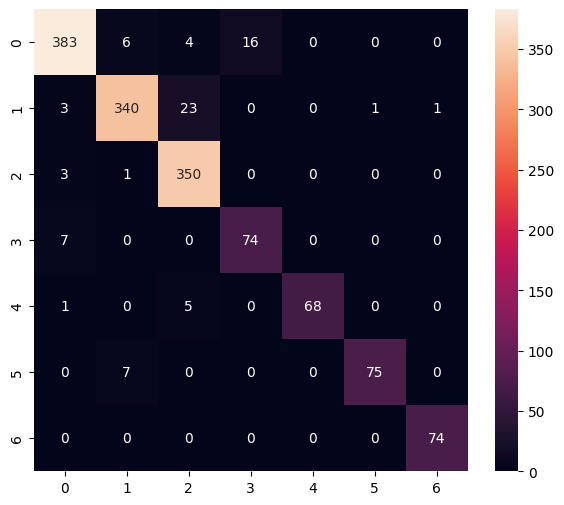

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       409
           1       0.96      0.92      0.94       368
           2       0.92      0.99      0.95       354
           3       0.82      0.91      0.87        81
           4       1.00      0.92      0.96        74
           5       0.99      0.91      0.95        82
           6       0.99      1.00      0.99        74

    accuracy                           0.95      1442
   macro avg       0.95      0.94      0.94      1442
weighted avg       0.95      0.95      0.95      1442



In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [56]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [57]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\koush\AppData\Local\Temp\tmp5ib4hq2c\assets


INFO:tensorflow:Assets written to: C:\Users\koush\AppData\Local\Temp\tmp5ib4hq2c\assets


6672

# 推論テスト

In [58]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [59]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [60]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [61]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 999 µs


In [62]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[7.3888563e-02 9.9572420e-02 7.9380208e-01 3.7895810e-04 1.7028812e-02
 1.5160744e-02 1.6845753e-04]
2
